# <center>Spam Classification with Naive Bayes


***Context***
The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged according being ham (legitimate) or spam. Your job is to build a classifier to identify message as ham or spam. 

***Content***
The files contain one message per line. Each line is composed by two columns: first contains the label (ham or spam) and second coloumn contains the raw text.The dataset has been taken from [Kaggle](https://www.kaggle.com/uciml/sms-spam-collection-dataset).

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import nltk

**Checking the Length of SMS**

In [2]:
import pandas
df_sms = pd.read_csv('spam.csv',encoding='latin-1')
df_sms.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df_sms.tail()

,label,sms
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [4]:
#Number of observations in each label spam and ham
df_sms.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [5]:
df_sms.describe()

,label,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
df_sms['length'] = df_sms['sms'].apply(len)
df_sms.head()

,label,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [7]:
print (f"Maximum length of SMS is {max(df_sms['length'])}")

Maximum length of SMS is 910


In [8]:
print (f"Minimim length of SMS is {min(df_sms['length'])}")

Minimim length of SMS is 2


Text(0, 0.5, 'Frequency')

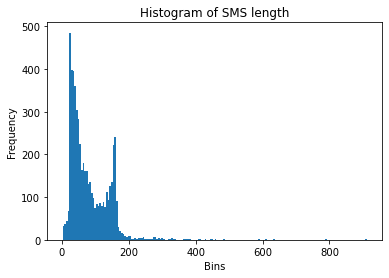

In [24]:
import matplotlib.pyplot as plt

data = list(df_sms['length'])
binsize = 5
plt.hist(data, bins=range(min(data), max(data) + binsize, binsize))

plt.title('Histogram of SMS length')
plt.xlabel("Bins")
plt.ylabel("Frequency")

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

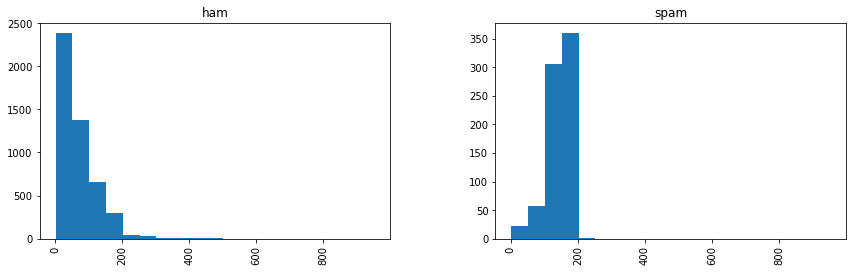

In [23]:
binsize = 50
df_sms.hist(column='length', by='label', bins=range(min(data), max(data) + binsize, binsize),figsize=(14,4))

In [11]:
#replace ham with 0 and spam with 1
df_sms.loc[:,'label'] = df_sms.label.map({'ham':0, 'spam':1})
print(df_sms.shape)
df_sms.head()

(5572, 3)


,label,sms,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


## Bag of Words Approach


What we have here in our data set is a collection of text data (5,572 rows of data). Most ML algorithms rely on numerical data to be fed into them as input, and email/sms messages are usually text heavy.
We need a way to represent text data for machine learning algorithm and the bag-of-words model helps us to achieve that task.
It is a way of extracting features from the text for use in machine learning algorithms.
In this approach, we use the tokenized words for each observation and find the frequency of each token.
Using a process which we will go through now, we can convert a collection of documents to a matrix, with each document being a row and each word(token) being the column, and the corresponding (row,column) values being the frequency of occurrence of each word or token in that document.

For example:

Let's say we have 4 documents as follows:

**['Hello, how are you!',
'Win money, win from home.',
'Call me now',
'Hello, Call you tomorrow?']**

Our objective here is to convert this set of text to a frequency distribution matrix, as follows:
<img src="https://image.ibb.co/casG7U/countvectorizer.png" alt="table">

Here as we can see, the documents are numbered in the rows, and each word is a column name, with the corresponding value being the frequency of that word in the document.

Lets break this down and see how we can do this conversion using a small set of documents.

To handle this, we will be using sklearns count vectorizer method which does the following:

1.  It tokenizes the string(separates the string into individual words) and gives an integer ID to each token.
2. It counts the occurrence of each of those tokens.

**Implementation of Bag of Words Approach in Python**

Step 1: Convert all strings to their lower case form.

In [29]:


documents = ['Hi, how are you?', 
             'Win money, win from home. Call now.', 
             'Hi. Call you now or tomorrow?']

lower_case_documents = []
lower_case_documents = [d.lower() for d in documents]
print(lower_case_documents)


['hi, how are you?', 'win money, win from home. call now.', 'hi. call you now or tomorrow?']


Step 2: Removing all punctuations

In [30]:
sans_punctuation_documents = []
import string

for i in lower_case_documents:
    sans_punctuation_documents.append(i.translate(str.maketrans("","", string.punctuation)))
    
sans_punctuation_documents

['hi how are you',
 'win money win from home call now',
 'hi call you now or tomorrow']

Step 3: Tokenization

In [31]:
preprocessed_documents = [[w for w in d.split()] for d in sans_punctuation_documents]
preprocessed_documents

[['hi', 'how', 'are', 'you'],
 ['win', 'money', 'win', 'from', 'home', 'call', 'now'],
 ['hi', 'call', 'you', 'now', 'or', 'tomorrow']]

Step 4: Count frequencies

In [32]:
frequency_list = []
import pprint
from collections import Counter

frequency_list = [Counter(d) for d in preprocessed_documents]
pprint.pprint(frequency_list)

[Counter({'hi': 1, 'how': 1, 'are': 1, 'you': 1}),
 Counter({'win': 2, 'money': 1, 'from': 1, 'home': 1, 'call': 1, 'now': 1}),
 Counter({'hi': 1, 'call': 1, 'you': 1, 'now': 1, 'or': 1, 'tomorrow': 1})]


**Implementing Bag of Words in scikit-learn**

'''
Here we will look to create a frequency matrix on a smaller document set to make sure we understand how the 
document-term matrix generation happens. We have created a sample document set 'documents'.
'''
documents = ['Hello, how are you!',
                'Win money, win from home.',
                'Call me now.',
                'Hello, Call hello you tomorrow?']

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

**Data preprocessing with  ()**

In above step, we implemented a version of the CountVectorizer() method from scratch that entailed cleaning our data first. This cleaning involved converting all of our data to lower case and removing all punctuation marks. CountVectorizer() has certain parameters which take care of these steps for us. They are:

lowercase = True

The lowercase parameter has a default value of True which converts all of our text to its lower case form.

token_pattern = (?u)\\b\\w\\w+\\b

The token_pattern parameter has a default regular expression value of (?u)\\b\\w\\w+\\b which ignores all punctuation marks and treats them as delimiters, while accepting alphanumeric strings of length greater than or equal to 2, as individual tokens or words.

stop_words

The stop_words parameter, if set to english will remove all words from our document set that match a list of English stop words which is defined in scikit-learn. Considering the size of our dataset and the fact that we are dealing with SMS messages and not larger text sources like e-mail, we will not be setting this parameter value.

In [34]:
count_vector.fit(documents)
count_vector.get_feature_names()

['are',
 'call',
 'from',
 'hi',
 'home',
 'how',
 'money',
 'now',
 'or',
 'tomorrow',
 'win',
 'you']

In [35]:
doc_array = count_vector.transform(documents).toarray()
doc_array

array([[1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 2, 0],
       [0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1]], dtype=int64)

In [36]:
frequency_matrix = pd.DataFrame(doc_array, columns = count_vector.get_feature_names())
frequency_matrix

,are,call,from,hi,home,how,money,now,or,tomorrow,win,you
0,1,0,0,1,0,1,0,0,0,0,0,1
1,0,1,1,0,1,0,1,1,0,0,2,0
2,0,1,0,1,0,0,0,1,1,1,0,1


### Before generating document-term matrix, lets separate the SMS data into train and test

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_sms['sms'], 
                                                    df_sms['label'],test_size=0.20, 
                                                    random_state=1)


In [38]:
# Instantiate the CountVectorizer method
count_vector = CountVectorizer()

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. 
testing_data = count_vector.transform(X_test)

In [39]:
print (training_data.shape)

(4457, 7777)


In [40]:
print (testing_data.shape)


(1115, 7777)


## Implementation of Naive Bayes Machine Learning Algorithm 

We use  sklearns **sklearn.naive_bayes** method to make predictions on our dataset.

Specifically, we use **multinomial Naive Bayes** implementation. This particular classifier is suitable for classification with discrete features (such as in our case, word counts for text classification). It takes in integer word counts as its input. On the other hand **Gaussian Naive Bayes** is better suited for continuous data as it assumes that the input data has a Gaussian(normal) distribution.

In [41]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data,y_train)

MultinomialNB()

In [42]:
#Make prediction on test dataset
predictions = naive_bayes.predict(testing_data)

**Evaluating our model**

Now that we have made predictions on our test set, our next goal is to evaluate how well our model is doing. There are various mechanisms for doing so, but first let's do quick recap of them.

**Accuracy** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

**Precision** tells us what proportion of messages we classified as spam, actually are spam. It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classification), in other words it is the ratio of

**[True Positives/(True Positives + False Positives)]**

**Recall(sensitivity)** tells us what proportion of messages that actually are spam were classified by us as spam. It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

**[True Positives/(True Positives + False Negatives)]**

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score.

We will be using all 4 metrics to make sure our model does well. For all 4 metrics whose values can range from 0 to 1, having a score as close to 1 as possible is a good indicator of how well our model is doing.

In [87]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, predictions)))
print('Precision score: {}'.format(precision_score(y_test, predictions)))
print('Recall score: {}'.format(recall_score(y_test, predictions)))
print('F1 score: {}'.format(f1_score(y_test, predictions)))

Accuracy score: 0.9847533632286996
Precision score: 0.9420289855072463
Recall score: 0.935251798561151
F1 score: 0.9386281588447652


One of the major advantages that **Naive Bayes** has over other classification algorithms is its ability to handle an extremely large number of features. In our case, each word is treated as a feature and there are thousands of different words. Also, it performs well even with the presence of irrelevant features and is relatively unaffected by them.

The other major advantage it has is its relative simplicity. Naive Bayes' works well right out of the box and tuning it's parameters is rarely ever necessary, except usually in cases where the distribution of the data is known. 

It rarely ever overfits the data.

Another important advantage is that its model training and prediction times are very fast for the amount of data it can handle. 